In [17]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.columns

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#df.groupby()

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
len(df)

150

In [13]:
df.groupby(by='Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


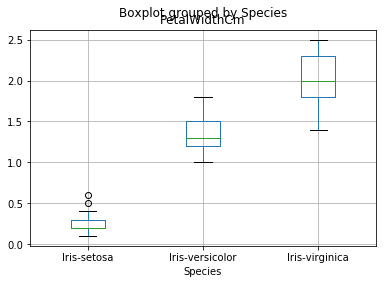

In [18]:
df.boxplot(column='PetalWidthCm',by='Species')

In [23]:
df[df['PetalWidthCm']<0.9]['Species'].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

In [25]:
df[df['PetalWidthCm']>0.9]['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [26]:
import seaborn as sns

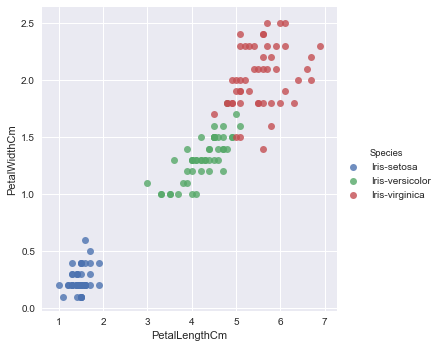

In [28]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df, fit_reg=False)

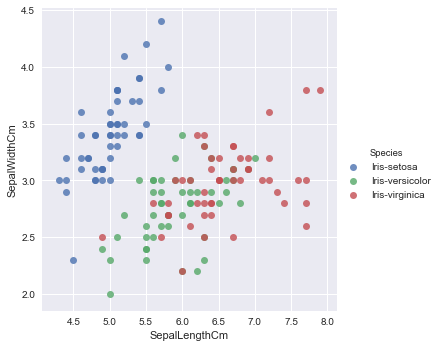

In [29]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, fit_reg=False)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:

logreg = LogisticRegression()


In [32]:
logreg.fit(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']], \
           df['Species'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
logreg.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

In [35]:
# one coef for each feature and for each class

In [36]:
from sklearn.model_selection import cross_val_score

In [41]:

cross_val_score(logreg, df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']], \
           df['Species'], cv=5).mean()


0.96000000000000019

In [ ]:
# so we're right 96% of the time.